In [1]:
import pandas as pd
import os
import glob
import datetime
import time
import datetime
from skimage import io
import numpy as np
import copy
import skimage

from PIL import Image
import matplotlib.pyplot as plt
import matplotlib

In [2]:
def read_dir(path):
    """
    Populate list of images from directory.

    ARGS:
    path - directory name with full path needed to reach it
    """
    data = pd.DataFrame()
    imgs = []
    
    for filename in glob.glob(os.path.join(path, '*.jpg')):
        try:
            date = Image.open(filename)._getexif()[36867]
            date = datetime.datetime.strptime(date, "%Y:%m:%d %H:%M:%S")
        except:
            date = np.NaN
            
        img = io.imread(filename)
        imgs.append(img)
        
        d = {'Datetime': date, 
             'Name': filename, 
             'Location': 'n/a', 
             'Shape': img.shape}
        data = data.append(d, ignore_index=True)
        
    return data, imgs

def pic(img):
        """
        Display the composite image.
        """
        io.imshow(img)
        io.show()

In [3]:
data, imgs = read_dir('test_selfies_p2\\')

# Histograms


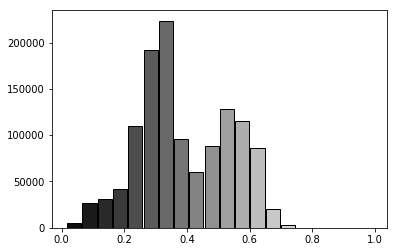

In [4]:
cmap = matplotlib.cm.get_cmap('Greys_r')


i=3
img = copy.copy(imgs[i])

img_gray = skimage.color.rgb2gray(img)


y, x = skimage.exposure.histogram(img_gray.flatten(), nbins=20)


plt.bar(x, y, width=.045, color=[cmap(val) for val in x], edgecolor='black', linewidth=1);

In [5]:
def make_xy(imgs, nbins=20):
    """
    Makes histogram arrays for a set of images, ready for plotting.
    """
    xs = []
    ys = []
    
    for i in range(len(imgs)):
        img_gray = skimage.color.rgb2gray(imgs[i])
        y, x = skimage.exposure.histogram(img_gray.flatten(), nbins=nbins)
        xs.append(x)
        ys.append(y)
        
    theta = []
    radii = []
    
    for i in range(nbins):
        alpha = []
        gamma = []
        for j in range(len(imgs)):
            alpha.append(xs[j][i])
            gamma.append(ys[j][i])
            
        theta.append(alpha)
        radii.append(gamma)
        
    return theta, radii


In [6]:
nbins = 50

x, y = make_xy(imgs, nbins=nbins)

NameError: name 'linealpha' is not defined

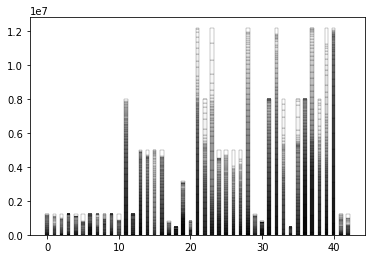

In [7]:
N = len(imgs)
bottom = 0
width = 0.045
cmap = matplotlib.cm.get_cmap('Greys_r')

ax = plt.subplot(111)

bottoms = np.zeros(len(x[0]))

for i in range(len(x)):
    ax.bar([val for val in range(len(x[0]))], y[i], width=0.5, bottom=bottoms, color=cmap(x[i]), edgecolor='black', linewidth=0.2)
    bottoms += np.array(y[i])
    
ax.axvline(10, ymax=.5, alpha=linealpha+.3, linewidth=linewidth+.09, color='black')


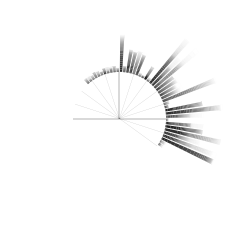

In [8]:
N = len(imgs)
bottom = 10_000_000
width = 0.045
cmap = matplotlib.cm.get_cmap('Greys_r')
# x_av = np.mean(x, axis=1)
x_av = np.linspace(0.0, 1.0, num=len(x), endpoint=True)

ax = plt.subplot(111, projection='polar')
rad_beg = np.linspace((np.pi*3/11), 13*np.pi / 11, N, endpoint=True)

bottoms = np.zeros(len(x[0]))+bottom

for i in range(len(x)):
    ax.bar(rad_beg, y[i], width=0.05, bottom=bottoms, color=cmap(x_av[i]), edgecolor='black', linewidth=0.001, alpha=0.9)
    bottoms += np.array(y[i])

linealpha = 0.5
linewidth = 0.2
# ax.axhline(1, alpha=linealpha, linewidth=linewidth, color='black')
plt.vlines(0, ymin=0, ymax=bottom, alpha=linealpha+.3, linewidth=linewidth+.09, color='black')
plt.vlines(np.pi/2, ymin=0, ymax=bottom, alpha=linealpha+.3, linewidth=linewidth+.09, color='black')
plt.vlines(np.pi, ymin=0, ymax=bottom, alpha=linealpha+.3, linewidth=linewidth+.09, color='black')

hours = 0
while hours <= (14*np.pi / 11):
    plt.vlines(hours, ymin=0, ymax=bottom, alpha=linealpha-.2, linewidth=linewidth, color='black')
    hours += np.pi/10
    
    
ax.set_theta_zero_location('W')
ax.set_theta_direction(-1)
plt.xticks([])
plt.yticks([])
ax.spines['polar'].set_visible(False)
# plt.show()

plt.savefig('gnomon2.png', dpi=750, bbox_inches='tight', transparent=True)

In [ ]:
pic(imgs[1])